## AD Omics Initial Import

- R data to Python and initial visualization
- pyreadr must be obtained using: conda install conda-forge::pyreadr
- Also scanpy

In [ ]:
import pyreadr
import pandas as pd

# Read the .rds file
file_path = r'C:\Users\Sarah\Dropbox\Sharejerah\ROSMAP\data\ROSMAP.VascularCells.meta_full.rds'
file_path_data = r'C:\Users\Sarah\Dropbox\Sharejerah\ROSMAP\data\ROSMAP.VascularCells.counts_full.rds'

result = pyreadr.read_r(file_path) 

# The result is a dictionary where keys are the names of objects 
# and values are pandas DataFrames
# If there's only one object in the RDS file:
scRNA_meta = result[None]  # or result[0] depending on the structure

#Add a new column to spell out the full cell types for visualization
def longname(celltype):
    if celltype=='Endo':
        return 'Endothelial'
    if celltype=='Fib':
        return 'Fibroblast'
    if celltype=='Per':
        return 'Pericyte'
    if celltype=='SMC':
        return 'Smooth Muscle Cell'
    if celltype=='Ependymal':
        return 'Ependymal'

scRNA_meta['celltype'].unique()
scRNA_meta['celltypefull']=scRNA_meta['celltype'].apply(longname)

# Now you have your data in a pandas DataFrame
print(scRNA_meta.shape)
print(scRNA_meta.columns)
print(scRNA_meta.head())


(22514, 17)
Index(['subject', 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'id',
       'library_id', 'batch', 'brain_region', 'age_death', 'msex', 'pmi',
       'ADdiag2types', 'percent.mt', 'percent.rp', 'celltype', 'cellsubtype',
       'celltypefull'],
      dtype='object')
                                       subject orig.ident  nCount_RNA  \
rownames                                                                
SM_171013Tsa.CTACCCAGTGCAACGA-3   ROSMAP-66835   vascular      1379.0   
SM_171013Tsa.AACTTTCTCTGCAGTA-7   ROSMAP-54289   vascular      1704.0   
SM_171013Tsa.AGATTGCGTGCAGTAG-7   ROSMAP-54289   vascular      1929.0   
SM_171013Tsa.CGCGGTACACGCATCG-13  ROSMAP-88138   vascular       895.0   
SM_171013Tsa.CTCTAATAGAAACCAT-15  ROSMAP-44543   vascular       895.0   

                                  nFeature_RNA  id library_id         batch  \
rownames                                                                      
SM_171013Tsa.CTACCCAGTGCAACGA-3           1053   3  

# Decided to load the dataset in RStudio instead. 

Installed R packages here: C:\Users\Sarah\AppData\Local\Temp\RtmpwRRQk3\downloaded_packages

Data: 
[1] "dgCMatrix"
attr(,"package")
[1] "Matrix"

# Dimensions (genes x cells)
[1] 15055 22514
Example gene name: "SAMD11" 
Example cell name: "SM_171013Tsa.CTACCCAGTGCAACGA-3"

- Data was successfully saved in Matrix Market format
- Data object is class Seurat, with 1 layer present called counts

15055 features across 22514 samples within 1 assay 
Active assay: RNA (15055 features, 0 variable features)

- R working directory where files saved (C:\Users\Sarah\Documents), then I moved them to data folder.
- Should be ready for Python

In [ ]:
import scanpy as sc
import pandas as pd
import os

# Specify the path with the raw string prefix
matrix_dir = r'C:\Users\Sarah\Dropbox\Sharejerah\ROSMAP\data'  

# Paths to the files
mtx_file = os.path.join(matrix_dir, "counts_matrix.mtx")
genes_file = os.path.join(matrix_dir, "gene_names.txt")
barcodes_file = os.path.join(matrix_dir, "cell_barcodes.txt")

# Check if these files exist
print(f"Matrix file exists: {os.path.exists(mtx_file)}")
print(f"Genes file exists: {os.path.exists(genes_file)}")
print(f"Barcodes file exists: {os.path.exists(barcodes_file)}")

# If they exist, load them
if os.path.exists(mtx_file) and os.path.exists(genes_file) and os.path.exists(barcodes_file):
    # Read the .mtx file
    adata = sc.read_mtx(mtx_file)
    
    # Print shape before assigning names
    print(f"Matrix shape: {adata.shape}")
    
    # Read gene and cell names
    genes = pd.read_csv(genes_file, header=None)
    cells = pd.read_csv(barcodes_file, header=None)
    
    print(f"Number of genes in file: {len(genes)}")
    print(f"Number of cells in file: {len(cells)}")
    
    # The error suggests the matrix is transposed from what we expect
    # In scanpy, the convention is (cells, genes) but the matrix might be (genes, cells)
    # Let's try transposing the matrix
    print("Transposing the matrix to match dimensions...")
    adata = adata.T
    
    # Now assign names
    print(f"Transposed matrix shape: {adata.shape}")
    
    # Check if the dimensions match now
    if adata.shape[1] == len(genes):
        adata.var_names = genes[0].values
        adata.obs_names = cells[0].values
        print("Successfully assigned gene and cell names!")
    else:
        print(f"Dimension mismatch: adata.shape[1]={adata.shape[1]}, genes={len(genes)}")
        # If still mismatched, try other combinations
        if adata.shape[0] == len(genes):
            print("Matrix appears to be in (genes, cells) format")
            adata = adata.copy()  # No transpose
            adata.obs_names = genes[0].values
            adata.var_names = cells[0].values
        else:
            print("Dimensions don't match in either orientation")
    
    print(f"Final data shape: {adata.shape}")
    print(f"Sample of var_names: {list(adata.var_names[:5])}")
    print(f"Sample of obs_names: {list(adata.obs_names[:5])}")
else:
    print("Matrix Market files not found in the specified directory.")

Matrix file exists: True
Genes file exists: True
Barcodes file exists: True
Matrix shape: (15055, 22514)
Number of genes in file: 15055
Number of cells in file: 22514
Transposing the matrix to match dimensions...
Transposed matrix shape: (22514, 15055)
Successfully assigned gene and cell names!
Final data shape: (22514, 15055)
Sample of var_names: ['SAMD11', 'NOC2L', 'KLHL17', 'HES4', 'ISG15']
Sample of obs_names: ['SM_171013Tsa.CTACCCAGTGCAACGA-3', 'SM_171013Tsa.AACTTTCTCTGCAGTA-7', 'SM_171013Tsa.AGATTGCGTGCAGTAG-7', 'SM_171013Tsa.CGCGGTACACGCATCG-13', 'SM_171013Tsa.CTCTAATAGAAACCAT-15']


In [16]:
adata.obs_names[1]

'SM_171013Tsa.AACTTTCTCTGCAGTA-7'

In [19]:
scRNA_meta.index[0]

'SM_171013Tsa.CTACCCAGTGCAACGA-3'

# Standard scRNA-seq Characterization Plots
For scRNA-seq data analysis, several standard visualization approaches are typically used:

- Quality control metrics visualization
- Cell type distribution analysis
- Dimensionality reduction plots (PCA, t-SNE, UMAP)
- Gene expression patterns across cell types
- Differential expression analysis

In [20]:
#standard packages
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import scanpy as sc

In [36]:
#Quality control metrics visualization

# Violin plots of key QC metrics
def plot_qc_violins(meta_df):
    # Create subplots
    fig = make_subplots(rows=1, cols=3, 
                        subplot_titles=('RNA counts per cell', 'Genes detected per cell', 'Mitochondrial content (%)'))
    
    # RNA counts
    fig.add_trace(
        go.Violin(y=meta_df['nCount_RNA'], box_visible=True, line_color='black',
                 fillcolor='lightseagreen', opacity=0.6, name='RNA counts'),
        row=1, col=1
    )
    
    # Number of genes
    fig.add_trace(
        go.Violin(y=meta_df['nFeature_RNA'], box_visible=True, line_color='black',
                 fillcolor='darkorange', opacity=0.6, name='Gene count'),
        row=1, col=2
    )
    
    # Mitochondrial percentage
    fig.add_trace(
        go.Violin(y=meta_df['percent.mt'], box_visible=True, line_color='black',
                 fillcolor='indianred', opacity=0.6, name='MT %'),
        row=1, col=3
    )
    
    # Update layout
    fig.update_layout(height=400, width=1000, title_text="QC Metrics Distribution")
    return fig

In [38]:
#QC Scatter plots to identify outliers
def plot_qc_scatter(meta_df):
    # Create a figure with 2 subplots
    fig = make_subplots(rows=1, cols=2, 
                        subplot_titles=('RNA counts vs Genes', 'Mitochondrial % vs Genes'))
    
    # RNA counts vs number of genes
    fig.add_trace(
        go.Scatter(x=meta_df['nFeature_RNA'], y=meta_df['nCount_RNA'],
                  mode='markers', marker=dict(color='lightseagreen', opacity=0.5, size=5),
                  name='Cells'),
        row=1, col=1
    )
    
    # Mitochondrial percentage vs number of genes
    fig.add_trace(
        go.Scatter(x=meta_df['nFeature_RNA'], y=meta_df['percent.mt'],
                  mode='markers', marker=dict(color='indianred', opacity=0.5, size=5),
                  name='Cells'),
        row=1, col=2
    )
    
    # Update layout
    fig.update_layout(height=400, width=900, 
                     title_text="QC Relationships")
    
    # Update axes
    fig.update_xaxes(title_text="Genes detected", row=1, col=1)
    fig.update_yaxes(title_text="RNA counts", row=1, col=1)
    fig.update_xaxes(title_text="Genes detected", row=1, col=2)
    fig.update_yaxes(title_text="Mitochondrial %", row=1, col=2)
    
    return fig

In [37]:
# Determine cell type composition

def plot_celltype_composition(meta_df):
    # Count cells by celltype
    celltype_counts = meta_df['celltypefull'].value_counts().reset_index()
    celltype_counts.columns = ['celltype', 'count']
    
    # Create pie chart
    fig = px.pie(celltype_counts, values='count', names='celltype',
                title='Cell Type Composition',
                color_discrete_sequence=px.colors.qualitative.Bold)
    
    fig.update_traces(textposition='inside', textinfo='percent+label')
    fig.update_layout(height=500, width=700)
    
    return fig

# Bar chart of cell types by subject
def plot_celltype_by_subject(meta_df):
    # Group by subject and celltype
    grouped = meta_df.groupby(['subject', 'celltype']).size().reset_index(name='count')
    
    # Create stacked bar chart
    fig = px.bar(grouped, x='subject', y='count', color='celltype',
                title='Cell Type Composition by Subject',
                color_discrete_sequence=px.colors.qualitative.Bold)
    
    fig.update_layout(height=500, width=900)
    
    return fig

In [39]:
# Check if data is already log-transformed
def is_log_transformed(adata):
    # Quick heuristic: log-transformed data usually has many small values (< 1)
    # and very few large values
    if sparse.issparse(adata.X):
        sample = adata.X[:1000].toarray() if adata.n_obs > 1000 else adata.X.toarray()
    else:
        sample = adata.X[:1000] if adata.n_obs > 1000 else adata.X
    
    # Log-transformed data typically has negative values or many values < 1
    return np.any(sample < 0) or np.mean(sample < 1) > 0.5

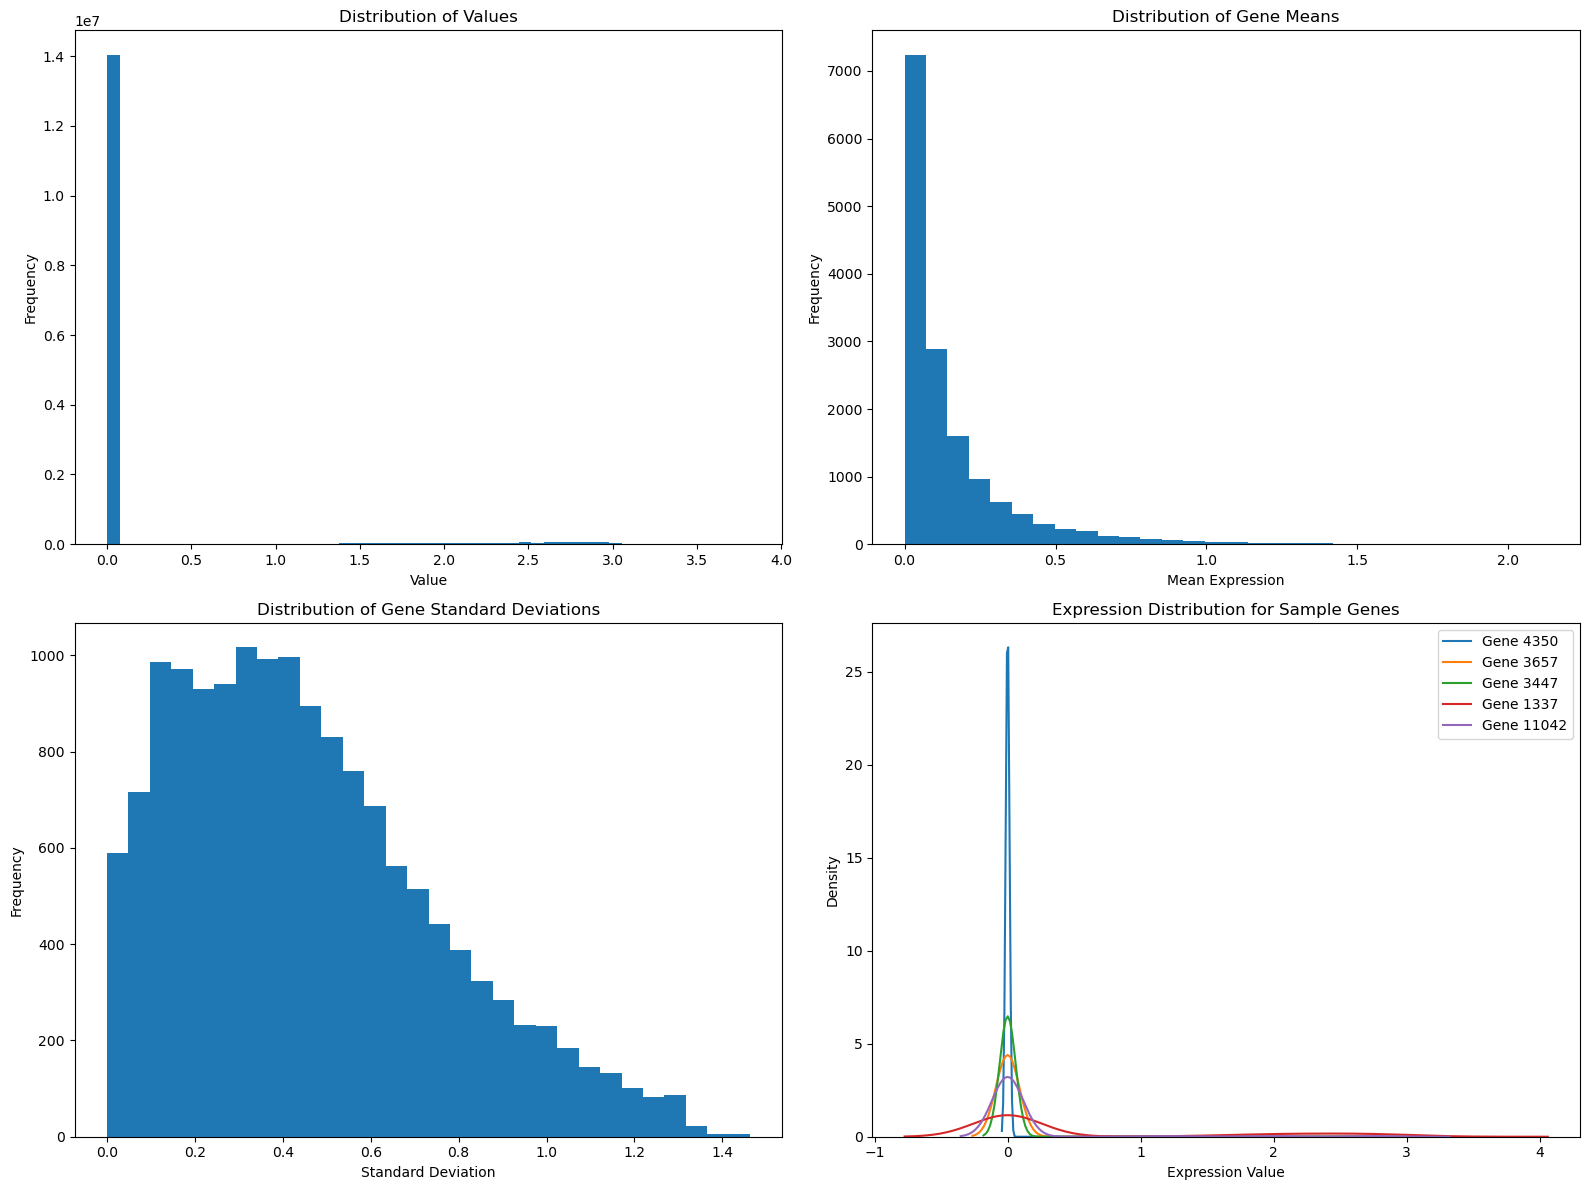

{'Distribution': {'small_values_ratio': np.float64(0.9336045167718366), 'has_negative_values': np.False_, 'max_value': np.float32(3.814787), 'min_value': np.float32(0.0), 'mean_of_means': np.float32(0.15132403), 'mean_of_stds': np.float32(0.4537434)}, 'Likely_state': {'is_raw_counts': np.False_, 'is_normalized': np.False_, 'is_log_transformed': np.True_, 'is_scaled': np.False_}}


In [43]:
#Check if data is already normalized/scaled
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import scanpy as sc

def check_data_preprocessing(adata):
    """Check if data appears to be already normalized and/or scaled"""
    results = {}
    
    # Extract a sample of data for efficiency
    if adata.n_obs > 1000:
        if hasattr(adata.X, 'toarray'):  # For sparse matrices
            sample = adata.X[:1000].toarray()
        else:
            sample = adata.X[:1000]
    else:
        if hasattr(adata.X, 'toarray'):
            sample = adata.X.toarray()
        else:
            sample = adata.X
    
    # Check 1: Look at value distribution
    means = np.mean(sample, axis=0)
    stds = np.std(sample, axis=0)
    
    # Check for log-transformation
    # Log-transformed data usually has many values < 1
    small_values_ratio = np.mean(sample < 1)
    has_negative = np.any(sample < 0)
    max_value = np.max(sample)
    min_value = np.min(sample)
    
    results['Distribution'] = {
        'small_values_ratio': small_values_ratio,
        'has_negative_values': has_negative,
        'max_value': max_value,
        'min_value': min_value,
        'mean_of_means': np.mean(means),
        'mean_of_stds': np.mean(stds)
    }
    
    # Interpretation
    results['Likely_state'] = {
        # Raw counts are integers with no negative values
        'is_raw_counts': not has_negative and np.all(np.mod(sample, 1) == 0) and max_value > 50,
        
        # Normalized data usually has a target sum but still non-negative
        'is_normalized': not has_negative and small_values_ratio < 0.5 and max_value < 50,
        
        # Log-transformed data has many small values
        'is_log_transformed': small_values_ratio > 0.5 and max_value < 50,
        
        # Scaled data typically has mean 0 and std 1, with negative values
        'is_scaled': has_negative and abs(np.mean(means)) < 0.1 and 0.5 < np.mean(stds) < 1.5
    }
    
    # Visualization of value distribution
    plt.figure(figsize=(16, 12))
    
    # Plot 1: Histogram of all values
    plt.subplot(2, 2, 1)
    plt.hist(sample.flatten(), bins=50)
    plt.title('Distribution of Values')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    
    # Plot 2: Distribution of means
    plt.subplot(2, 2, 2)
    plt.hist(means, bins=30)
    plt.title('Distribution of Gene Means')
    plt.xlabel('Mean Expression')
    plt.ylabel('Frequency')
    
    # Plot 3: Distribution of standard deviations
    plt.subplot(2, 2, 3)
    plt.hist(stds, bins=30)
    plt.title('Distribution of Gene Standard Deviations')
    plt.xlabel('Standard Deviation')
    plt.ylabel('Frequency')
    
    # Plot 4: Expression values for a few random genes
    plt.subplot(2, 2, 4)
    gene_indices = np.random.choice(sample.shape[1], min(5, sample.shape[1]), replace=False)
    for idx in gene_indices:
        sns.kdeplot(sample[:, idx], label=f'Gene {idx}')
    plt.title('Expression Distribution for Sample Genes')
    plt.xlabel('Expression Value')
    plt.ylabel('Density')
    plt.legend()
    
    plt.tight_layout()
    plt.show()
    
    return results

# Run the check
preprocessing_state = check_data_preprocessing(adata)
print(preprocessing_state)

In [ ]:
import numpy as np
import scanpy as sc
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from scipy import sparse

# Fix for NumPy 2.0+ compatibility with older scanpy
if not hasattr(np, 'infty'):
    np.infty = np.inf

def run_scRNA_analysis(adata, meta_df):
    # 1. QC Plots
    qc_violin_fig = plot_qc_violins(meta_df)
    qc_violin_fig.show()
    
    qc_scatter_fig = plot_qc_scatter(meta_df)
    qc_scatter_fig.show()
    
    # 2. Cell Type Composition
    celltype_fig = plot_celltype_composition(meta_df)
    celltype_fig.show()
    
    celltype_subject_fig = plot_celltype_by_subject(meta_df)
    celltype_subject_fig.show()
    
    # 3. Preprocessing with adjustments for already log-transformed data
    adata_pp = adata.copy()
    
    # Normalize
    sc.pp.normalize_total(adata_pp, target_sum=1e4)
    
    # Check if data appears to be log-transformed
    if not is_log_transformed(adata_pp):
        sc.pp.log1p(adata_pp)
    else:
        print("Skipping log1p as data appears to be already log-transformed")
    
    # Find highly variable genes
    sc.pp.highly_variable_genes(adata_pp, min_mean=0.0125, max_mean=3, min_disp=0.5)
    adata_hvg = adata_pp[:, adata_pp.var.highly_variable]
    
    try:
        # Scale the data (with max_value to avoid influence of outliers)
        sc.pp.scale(adata_hvg, max_value=10)
    except Exception as e:
        print(f"Warning during scaling: {e}")
    
    # 4. Dimensionality Reduction
    sc.tl.pca(adata_hvg, svd_solver='arpack')
    
    try:
        # Compute the neighborhood graph
        sc.pp.neighbors(adata_hvg, n_neighbors=15, n_pcs=30)
        
        # Run UMAP
        sc.tl.umap(adata_hvg)
    except Exception as e:
        print(f"Error in neighbors/UMAP computation: {e}")
        print("Trying alternative approach...")
        try:
            # Attempt with fewer PCs and modified parameters
            sc.pp.neighbors(adata_hvg, n_neighbors=10, n_pcs=20, method='gauss')
            sc.tl.umap(adata_hvg)
        except Exception as e2:
            print(f"Alternative approach also failed: {e2}")
            print("Skipping UMAP visualization")
            return adata_hvg
    
    # Transfer metadata
    for col in meta_df.columns:
        if col in adata_hvg.obs.columns:
            continue
        try:
            adata_hvg.obs[col] = meta_df.loc[adata_hvg.obs.index, col].values
        except:
            print(f"Could not transfer metadata column: {col}")
    
    # 5. UMAP Visualizations (if UMAP succeeded)
    if 'X_umap' in adata_hvg.obsm:
        umap_celltype_fig = plot_umap(adata_hvg, color_by='celltype', title='UMAP by Cell Type')
        umap_celltype_fig.show()
        
        umap_brain_region_fig = plot_umap(adata_hvg, color_by='brain_region', title='UMAP by Brain Region')
        umap_brain_region_fig.show()
    
    # 6. Gene Expression Visualization
    genes_to_plot = ['SNAP25', 'SLC17A7', 'GAD1', 'MOG', 'AQP4']
    
    for gene in genes_to_plot:
        if gene in adata_hvg.var_names:
            # If UMAP succeeded, plot expression on UMAP
            if 'X_umap' in adata_hvg.obsm:
                gene_fig = plot_gene_expression(adata_hvg, gene)
                if gene_fig:
                    gene_fig.show()
            
            # Plot expression by group (doesn't require UMAP)
            group_fig = plot_gene_expression_by_group(adata_hvg, gene)
            if group_fig:
                group_fig.show()
    
    return adata_hvg

In [42]:
adata_hvg = run_scRNA_analysis(adata, scRNA_meta)

Skipping log1p as data appears to be already log-transformed


c:\Users\Sarah\.conda\envs\datasci\Lib\site-packages\scanpy\preprocessing\_scale.py:317: UserWarning:

Received a view of an AnnData. Making a copy.

